In [70]:
import os
from pprint import pprint
import warnings

warnings.filterwarnings("ignore")

import ipywidgets as widgets
from ipywidgets import interact

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import (DateFormatter, MO, WeekdayLocator)
import seaborn as sns

In [71]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

## Load the Data

In [72]:
# Your current working directory
os.getcwd()

'/Users/romainegele/Documents/xPrize/Transatlantic-Pandemic-Price/covid-xprize/visualization'

In [73]:
# Path to the CSV file to load
# To generate this file I first had to runt the "linear" baseline
csv_path = "../covid_xprize/examples/predictors/linear/data/OxCGRT_latest.csv"

df = pd.read_csv(csv_path)

## Print Data Types

In [74]:
columns = list(df.columns)
print(f"{len(columns)} columns\n")

print(df.dtypes)

47 columns

CountryName                               object
CountryCode                               object
RegionName                                object
RegionCode                                object
Jurisdiction                              object
Date                                       int64
C1_School closing                        float64
C1_Flag                                  float64
C2_Workplace closing                     float64
C2_Flag                                  float64
C3_Cancel public events                  float64
C3_Flag                                  float64
C4_Restrictions on gatherings            float64
C4_Flag                                  float64
C5_Close public transport                float64
C5_Flag                                  float64
C6_Stay at home requirements             float64
C6_Flag                                  float64
C7_Restrictions on internal movement     float64
C7_Flag                                  float64
C8_Inter

In [83]:
# Do we have NaN values?
which_columns = list(subdf.columns)

for col_name in which_columns:
    print(f"'{col_name}' has NaN: {subdf[which_columns].isnull().values.any()}")

'CountryName' has NaN: True
'CountryCode' has NaN: True
'RegionName' has NaN: True
'RegionCode' has NaN: True
'Jurisdiction' has NaN: True
'Date' has NaN: True
'C1_School closing' has NaN: True
'C1_Flag' has NaN: True
'C2_Workplace closing' has NaN: True
'C2_Flag' has NaN: True
'C3_Cancel public events' has NaN: True
'C3_Flag' has NaN: True
'C4_Restrictions on gatherings' has NaN: True
'C4_Flag' has NaN: True
'C5_Close public transport' has NaN: True
'C5_Flag' has NaN: True
'C6_Stay at home requirements' has NaN: True
'C6_Flag' has NaN: True
'C7_Restrictions on internal movement' has NaN: True
'C7_Flag' has NaN: True
'C8_International travel controls' has NaN: True
'E1_Income support' has NaN: True
'E1_Flag' has NaN: True
'E2_Debt/contract relief' has NaN: True
'E3_Fiscal measures' has NaN: True
'E4_International support' has NaN: True
'H1_Public information campaigns' has NaN: True
'H1_Flag' has NaN: True
'H2_Testing policy' has NaN: True
'H3_Contact tracing' has NaN: True
'H4_Emergen

In [75]:
# Shows the date format
df["Date"][:10]

0    20200101
1    20200102
2    20200103
3    20200104
4    20200105
5    20200106
6    20200107
7    20200108
8    20200109
9    20200110
Name: Date, dtype: int64

In [76]:
# Show what are the current countries

countries = sorted(pd.unique(df["CountryName"]))
number_of_countries = len(countries)
print(f"{number_of_countries} different countries")
pprint(countries)

182 different countries
['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Argentina',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faeroe Islands',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Honduras',
 '

## Plot Number of Cases and Deaths By Country

In [84]:
def plot_number_of_cases_and_deaths(country):
    subdf = df.loc[df["CountryName"] == country]
    x = subdf["Date"].tolist()
    
    width = 5
    height = width/1.618
    fig = plt.figure(figsize=(width,height))
    plt.title(country)
    
    dates = pd.to_datetime(pd.Series([str(xi) for xi in x]), format = '%Y%m%d').tolist()
    
    plt.plot_date(dates, subdf["ConfirmedCases"], ".", markersize=2, label="confirmed cases")
    plt.plot_date(dates, subdf["ConfirmedDeaths"], ".", markersize=2, label="confirmed deaths")
    
    loc = WeekdayLocator(byweekday=MO, interval=3)
    formatter = DateFormatter('%d/%m/%y')

    ax = plt.gca()
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_tick_params(rotation=30, labelsize=10)

    plt.ylabel("Number of 'legend'")
    plt.xlabel("Dates")
    plt.legend()
    plt.tight_layout()
    plt.show()
    

w_countries = widgets.Dropdown(
    options=countries,
    value='France',
    description='Country:',
    disabled=False
)

interact(plot_number_of_cases_and_deaths, country=w_countries)

interactive(children=(Dropdown(description='Country:', index=60, options=('Afghanistan', 'Albania', 'Algeria',…

<function __main__.plot_number_of_cases_and_deaths(country)>

## Select a subset of countries

In [77]:
selected_countries = ["France", "Spain", "China", "United Kingdom", "United States"]
subdf = df.loc[df["CountryName"].isin(selected_countries)]

## Number of "ConfirmedCases" by Country

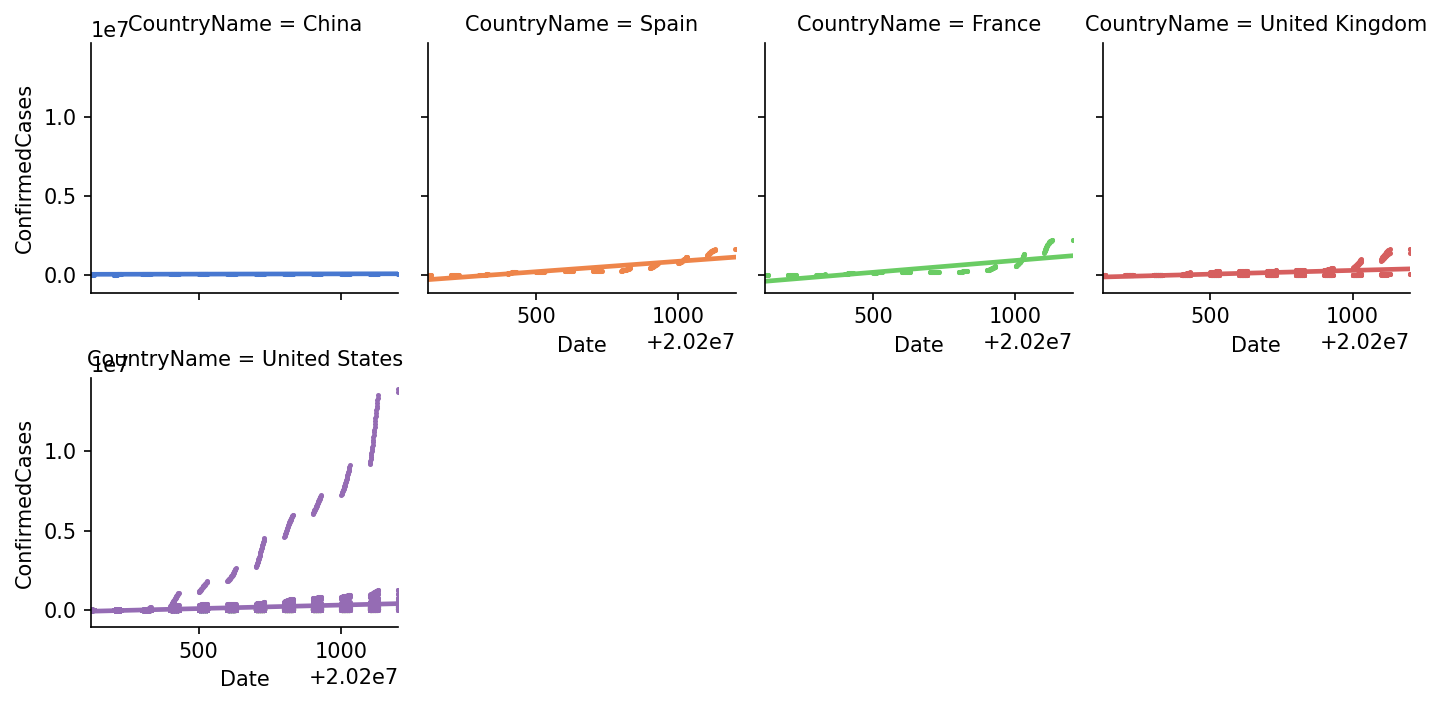

In [78]:
# Plot "ConfirmedCases" with respect to "Date" facet by "CountryName"
sns.lmplot(x="Date", y="ConfirmedCases", col="CountryName", hue="CountryName", data=subdf,
           col_wrap=4, ci=None, palette="muted", height=2.4, 
           scatter_kws={"s": 2, "alpha": 1})

plt.tight_layout()
plt.show()

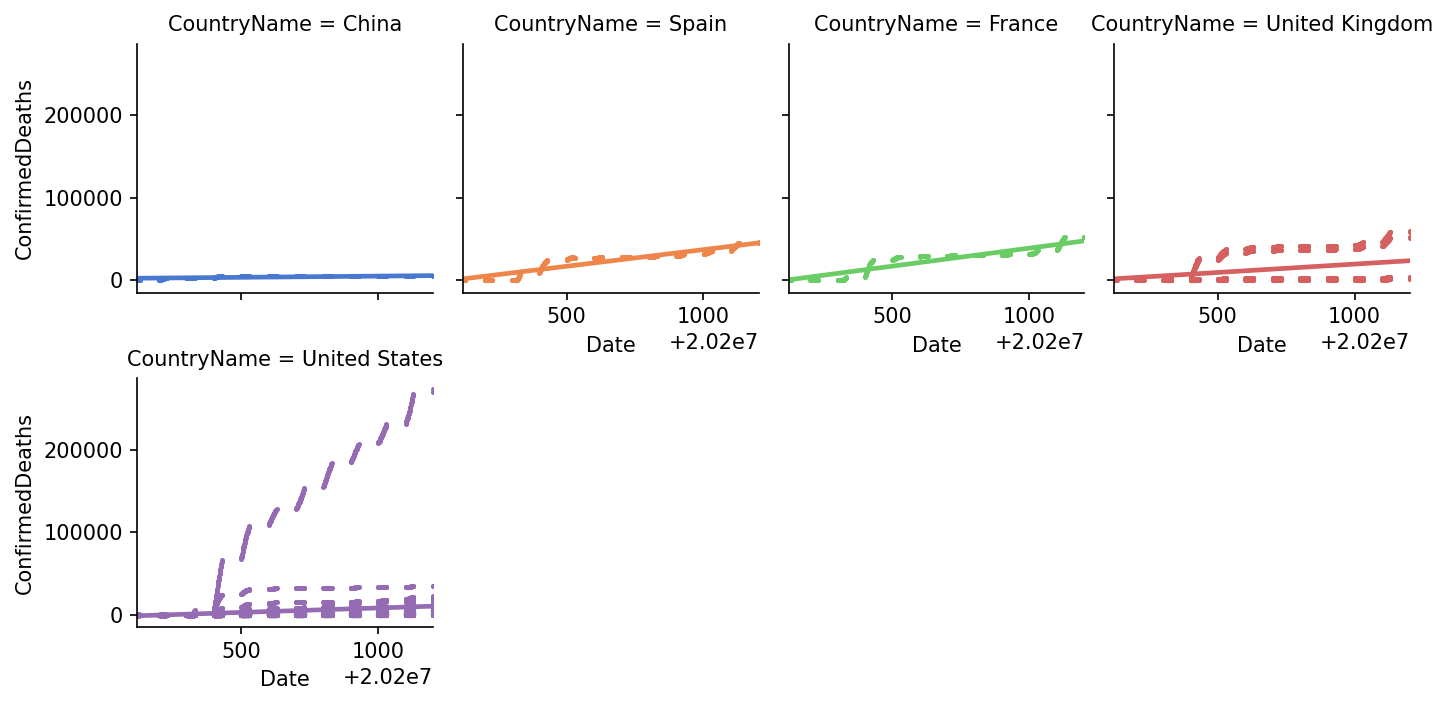

In [79]:
# Plot "ConfirmedDeaths" with respect to "Date" facet by "CountryName"
sns.lmplot(x="Date", y="ConfirmedDeaths", col="CountryName", hue="CountryName", data=subdf,
           col_wrap=4, ci=None, palette="muted", height=2.4, 
           scatter_kws={"s": 2, "alpha": 1})

plt.tight_layout()
plt.show()